# Just testing some of the new features...

In [1]:
import sys, os
import dotenv

sys.path.insert(1, './../')

from utils import *
import ana

In [2]:
ds = Datasets()

In [3]:
data = ana.NOvAData.init_from_copymerge_h5(h5dirs=[ds.COPYMERGED_C9_DIR])

In [12]:
data.fill_ana_flags(inplace=True)

In [4]:
v = ana.Var('rec.energy.numu', 'lstmnu')
v2 = ana.Var('rec.energy.numu', 'E')

In [5]:
s = ana.Spectrum(v, ana.Binning.STANDARD_ENERGY)
s2 = ana.Spectrum(v2, ana.Binning.STANDARD_ENERGY)

In [6]:
import matplotlib.pyplot as plt

In [7]:
ana.init_global_plotting_style()

In [13]:
data.table.columns

Index(['rec.energy.numu.E', 'rec.energy.numu.calccE',
       'rec.energy.numu.hadcalE', 'rec.energy.numu.hadtrkE',
       'rec.energy.numu.lstmmuon', 'rec.energy.numu.lstmnu',
       'rec.energy.numu.regcvnhadE', 'rec.energy.numu.trkccE',
       'rec.energy.numu.recomuonE', 'rec.energy.numu.hadclust.calE',
       'rec.energy.numu.hadclust.nhit', 'rec.mc.nnu', 'rec.mc.nu.E',
       'rec.mc.nu.pdg', 'rec.mc.nu.mode', 'rec.mc.nu.iscc',
       'rec.mc.nu.beam.potnum', 'rec.sel.contain.kalfwdcell',
       'rec.sel.contain.kalbakcell', 'rec.sel.contain.cosfwdcell',
       'rec.sel.contain.cosbakcell', 'rec.sel.cosrej.numucontpid2020fhc',
       'rec.sel.cvnloosepreselptp.cosmicid', 'rec.sel.cvnloosepreselptp.ncid',
       'rec.sel.cvnloosepreselptp.nueid', 'rec.sel.cvnloosepreselptp.numuid',
       'rec.sel.cvnloosepreselptp.nutauid', 'rec.sel.remid.pid',
       'rec.sel.scann.scpid', 'rec.sel.veto.keep', 'rec.slc.calE',
       'rec.slc.firstplane', 'rec.slc.lastplane', 'rec.slc.nhit',
     

In [16]:
import numpy as np

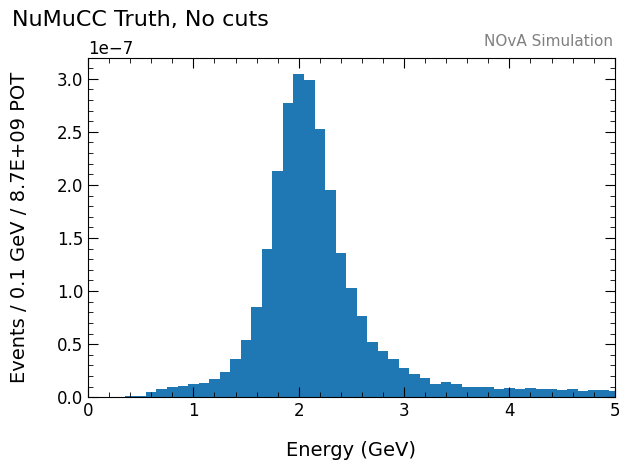

In [30]:
fig, ax = plt.subplots()

# ana.plot_spectrum(ax, data, s, 'LSTM', style='hist')
# ana.plot_spectrum(ax, data, s2, 'Old', style='hist')

pot = data.table[data.table['ana.mc.flag.isNuMuCC'] > 0]['rec.mc.nu.beam.potnum']
pot = np.sum(pot)

values, edges = np.histogram(
    data.table[data.table['ana.mc.flag.isNuMuCC'] > 0]['rec.mc.nu.E'],
    bins=np.linspace(0, 5, 50 + 1),
)

values = values / pot

ax.bar(edges[1:], values, width=edges[1] - edges[0])

ax.set_title('NuMuCC Truth, No cuts')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(f'Events / 0.1 GeV / {pot:0.1E} POT')

ax.set_xlim(0, 5)
ax.set_ylim(0)

# ax.legend()

ana.init_axes_formatting(ax);

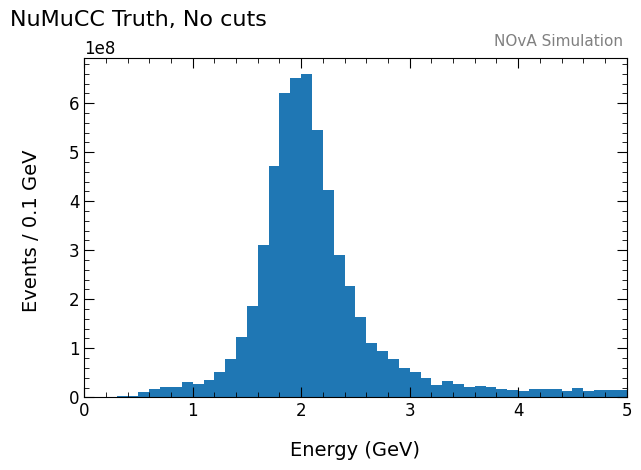

In [33]:
fig, ax = plt.subplots()

# ana.plot_spectrum(ax, data, s, 'LSTM', style='hist')
# ana.plot_spectrum(ax, data, s2, 'Old', style='hist')

pot = data.table[data.table['ana.mc.flag.isNuMuCC'] > 0]['rec.mc.nu.beam.potnum']

plt.hist(
    data.table[data.table['ana.mc.flag.isNuMuCC'] > 0]['rec.mc.nu.E'],
    bins=np.linspace(0, 5, 50 + 1),
    weights=pot
)

ax.set_title('NuMuCC Truth, No cuts')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(f'Events / 0.1 GeV ')

ax.set_xlim(0, 5)
ax.set_ylim(0)

# ax.legend()

ana.init_axes_formatting(ax);